# OpenStreetMap Overpass API in Python

by Michael T. Moen

Please see the following resources for more information on API usage for the OpenStreetMap Overpass API:

- Documentation
    - <a href="https://www.openstreetmap.org/" target="_blank">OpenStreetMap</a>
    - <a href="https://wiki.openstreetmap.org/wiki/Overpass_API" target="_blank">OpenStreetMap Overpass API Documentation</a>
- Terms
    - <a href="https://osmfoundation.org/wiki/Terms_of_Use" target="_blank">OpenStreetMap Terms of Use</a>
- Data Reuse
    - <a href="https://www.openstreetmap.org/copyright" target="_blank">OpenStreetMap Copyright and License</a>: The OpenStreetMap API is licensed under the <a href="https://opendatacommons.org/licenses/odbl/" target="_blank">Open Data Commons Open Database License</a>, which allows users to share, create, and adapt the database as long OpenStreetMap is attributed and the data is made available under the Open Database License.

For more information on the usage limitations of this service, please see the <a href="https://operations.osmfoundation.org/policies/nominatim/" target="_blank">Nominatim Usage Policy</a> and the <a href="https://dev.overpass-api.de/overpass-doc/en/preface/commons.html" target="_blank">Overpass Commons documentation</a>. Please ensure that if you use an alternative Nominatim or Overpass instance, you obey their usage policies.

This tutorial uses the OSMnx Python package to access the OpenStreetMap API. The examples used in this tutorial are inspired by those found in the official OSMnx Examples Gallery. Please see the following resources for more information on API usage for the OSMnx package:

- Documentation
    - <a href="https://osmnx.readthedocs.io/en/stable/" target="_blank">OSMnx Documentation</a>
    - <a href="https://github.com/gboeing/osmnx-examples/tree/main" target="_blank">OSMnx Examples Gallery</a>
- Terms
    - <a href="https://github.com/gboeing/osmnx/blob/main/LICENSE.txt" target="_blank">OSMnx License</a>

If you use OSMnx in your work, please cite the journal article:

Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." Computers, Environment and Urban Systems 65, 126-139.

*These recipe examples were tested on May 6, 2025.*

## Setup

The following external libraries need to be installed into your environment to run the code examples in this tutorial:

- <a href="https://github.com/ipython/ipykernel" target="_blank">ipykernel</a>
- <a href="https://github.com/matplotlib/matplotlib" target="_blank">matplotlib</a>
- <a href="https://github.com/gboeing/osmnx" target="_blank">osmnx</a>
- <a href="https://github.com/scikit-learn/scikit-learn" target="_blank">scikit-learn</a>

We import the libraries used in this tutorial below:

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

## 1. Retrieve and Download Feature and Boundary Data

The OSMnx contains several options for retrieving GIS data associated with locations, including:
- `geocode_to_gdf`
- `features_from_address`
- `features_from_bbox`
- `features_from_place`
- `features_from_point`
- `features_from_polygon`
- `features_from_xml`

These methods return GeoDataFrames that can be used to work with GIS data in Python or exported and saved as other formats.

### Using `geocode_to_gdf` to Download Boundary Data

This example uses the `geocode_to_gdf` method to retrieve the boundary data for the given query. This method returns a GeoDataFrame with a row for each query given. Note that the `geocode_to_gdf` method can also take a list of queries as an argument. In this case, the returned GeoDataFrame has a row for each query. An example of this is given later in this tutorial.

For more information on how you can use the `geocode_to_gdf` method, please see the <a href="https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.geocoder.geocode_to_gdf" target="_blank">OSMnx User Reference</a>.

In [2]:
place = 'Alabama, USA'
alabama_gdf = ox.geocode_to_gdf(place)

# Display GeoDataFrame
alabama_gdf

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-88.4731 31.8939, -88.47264 31.87512...",-88.473101,30.143376,-84.888289,35.008112,317707064,relation,161950,33.258882,-86.829534,boundary,administrative,8,0.762782,state,Alabama,"Alabama, United States"


By default, GeoPandas saves data as an ESRI Shapefile. This can also be explicitly defined by setting the driver to `ESRI Shapefile`:

In [4]:
# Save the files to a folder called 'alabama-shapefile'
alabama_gdf.to_file('alabama-shapefile')

# This does the same thing
# alabama_gdf.to_file('alabama-shapefile', driver='ESRI Shapefile')

C:\Users\mtmoen\AppData\Local\Temp\ipykernel_34632\300722641.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  alabama_gdf.to_file('alabama-shapefile')
c:\Users\mtmoen\AppData\Local\miniconda3\envs\api_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'addresstype' to 'addresstyp'
  ogr_write(
c:\Users\mtmoen\AppData\Local\miniconda3\envs\api_env\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'display_name' to 'display_na'
  ogr_write(


The data can also be saved as GeoJSON by setting the driver to `GeoJSON`:

In [5]:
alabama_gdf.to_file('alabama.json', driver='GeoJSON')

We can also save the data as a GeoPackage file by setting the driver to `GPKG`:

In [6]:
alabama_gdf.to_file('alabama.gpkg', driver='GPKG')

### Using `features_from_address` to Get Building Data

The `features_from_address` method takes three arguments:
- `address` is a string containing the address of the location of interest. This example uses the address of The University of Alabama.
- `tags` is a dictionary of map elements of interest in the given area. To see what elements can be queried, please see the <a href="https://wiki.openstreetmap.org/wiki/Map_features" target="_blank">OpenStreetMap Wiki</a>. This example retrieves buildings of all types by using the `True` value for the `building` key.
- `dist` (optional) is the distance in meters from the address that is searched. By default, this value is set to 1000.

For more information on how you can use the `features_from_address` method, please see the <a href="https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_address" target="_blank">OSMnx User Reference</a>.

In [7]:
address = '425 Stadium Dr, Tuscaloosa, AL 35401, United States'
tags = {
    'building': True
}
gdf = ox.features_from_address(address, tags, dist=500)

# Display GeoPandas DataFrame
gdf.head()

geometry access  \
element  id                                                                  
relation 1639197  POLYGON ((-87.55057 33.20647, -87.55061 33.206...    NaN   
         8507062  POLYGON ((-87.55343 33.20767, -87.55342 33.207...    NaN   
         8507063  POLYGON ((-87.55464 33.20698, -87.55504 33.206...    NaN   
         8507064  POLYGON ((-87.55466 33.20739, -87.55505 33.207...    NaN   
         8507065  POLYGON ((-87.55472 33.209, -87.55465 33.20899...    NaN   

                 amenity    building name operator operator:type parking  \
element  id                                                                
relation 1639197     NaN     stadium  NaN      NaN           NaN     NaN   
         8507062     NaN  apartments  NaN      NaN           NaN     NaN   
         8507063     NaN  apartments  NaN      NaN           NaN     NaN   
         8507064     NaN  apartments  NaN      NaN           NaN     NaN   
         8507065     NaN  apartments  NaN      NaN           NaN     NaN   

                 addr:city addr:housenumber  ... layer source addr:country  \
element  id                                  ...                             
relation 1639197       NaN              NaN  ...   NaN    NaN          NaN   
         8507062       NaN              NaN  ...   NaN    NaN          NaN   
         8507063       NaN              NaN  ...   NaN    NaN          NaN   
         8507064       NaN              NaN  ...   NaN    NaN          NaN   
         8507065       NaN              NaN  ...   NaN    NaN          NaN   

                 name:etymology:wikidata shelter_type bridge level alt_name  \
element  id                                                                   
relation 1639197                     NaN          NaN    NaN   NaN      NaN   
         8507062                     NaN          NaN    NaN   NaN      NaN   
         8507063                     NaN          NaN    NaN   NaN      NaN   
         8507064                     NaN          NaN    NaN   NaN      NaN   
         8507065                     NaN          NaN    NaN   NaN      NaN   

                          type              sport  
element  id                                        
relation 1639197  multipolygon  american_football  
         8507062  multipolygon                NaN  
         8507063  multipolygon                NaN  
         8507064  multipolygon                NaN  
         8507065  multipolygon                NaN  

[5 rows x 59 columns]

### Using `features_from_bbox` to Get Street Features

The `features_from_bbox` method takes two arguments:
- `bbox` is tuple of floats describing the boundaries of an area of interest. This tuple must be structured as `(west, south, east, north)`. This example looks at the area around St. Louis, MO.
- `tags` is a dictionary of map elements of interest in the given area. To see what elements can be queried, please see the <a href="https://wiki.openstreetmap.org/wiki/Map_features" target="_blank">OpenStreetMap Wiki</a>. This example retrieves the five largest classifications of `highway` as defined by OpenStreetMap.

For more information on how you can use the `features_from_bbox` method, please see the <a href="https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.features.features_from_bbox" target="_blank">OSMnx User Reference</a>.

In [8]:
north = 39.3
south = 38.1
east = -89.6
west = -91.1
bbox = (west, south, east, north)
tags = {
    'highway': ['motorway', 'trunk', 'primary', 'secondary', 'tertiary']
}
gdf = ox.features_from_bbox(bbox, tags)

Now we can graph the features above, which will be explored further in the next section.

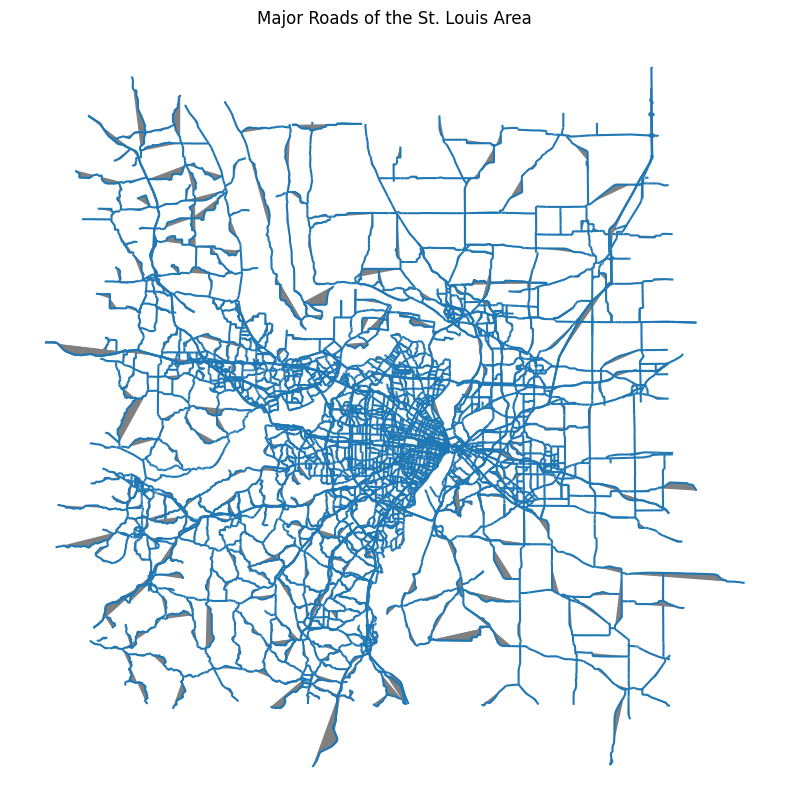

In [9]:
ax = gdf.plot(fc='gray', figsize=(10, 10))
ax.axis('off')
ax.set_title('Major Roads of the St. Louis Area')
plt.show()

## 2. Graphing with GeoPandas

GeoPandas allows for data to be printed using the `plot()` function:

<Axes: >

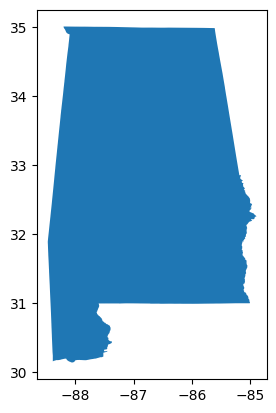

In [10]:
alabama_gdf.plot()

By default, GeoPandas includes latitude and longitude as the axes of the figure. This can be turned off by specifying `.axis('off')`. Additionally, we can suppress the output of metadata, like `<Axes: >` in the example above, by adding a semicolon `;` to the end of the line.

Additionally, we can modify the color of the figure with `plot()`'s fill color `fc` parameter. The `figsize` parameter can also be set with a tuple containing `(width, height)`. Note that aspect ratio of image is maintained, and only the more restrictive number between `width` and `height` is used for the graph.

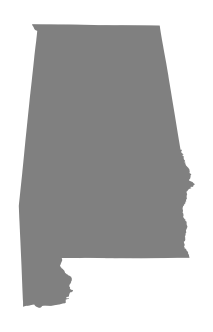

In [11]:
alabama_gdf.plot(fc='gray', figsize=(2.5, 5)).axis('off');

### Mapping the Buildings of The University of Alabama

OpenStreetMap contains building footprint data, allowing for individual building to be plotted.

In this example, the `features_from_place` method is used to retrieve the data for all buildings at The University of Alabama.

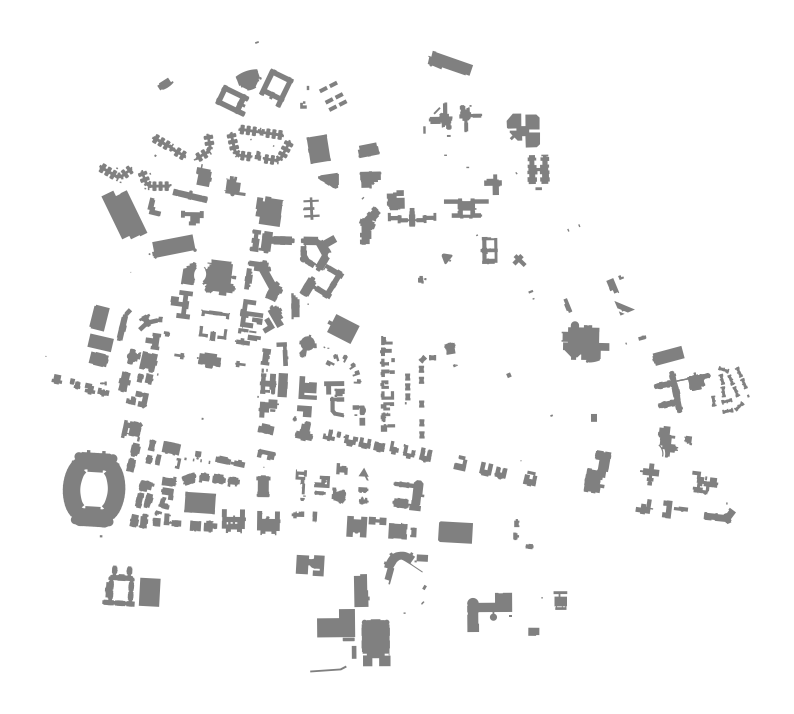

In [12]:
place = 'University of Alabama, AL USA'
tags = {
    'building': True
}
buildings = ox.features_from_place(place, tags)
buildings.plot(fc='gray', figsize=(10, 10)).axis('off');

We can use the metadata of the buildings to color them according to their purpose. The unique tags that we must consider are given below:

In [13]:
buildings['building'].unique()

array(['yes', 'stadium', 'university', 'dormitory', 'residential',
       'yes;dormitory', 'church', 'sports_centre', 'hotel', 'parking',
       'school', 'construction', 'commercial', 'service', 'college',
       'apartments', 'house', 'shed', 'roof', 'carport'], dtype=object)

Now, we can construct a dictionary assigning a color to each building type:

In [14]:
education_color = 'royalblue'
sports_color = 'tomato'
housing_color = 'forestgreen'
religious_color = 'darkmagenta'
services_color = 'sienna'
other_color = 'dimgray'
undefined_color = 'lightgray'

colors = {
    'university': education_color,
    'college': education_color,
    'school': education_color,

    'dormitory': housing_color,
    'hotel': housing_color,
    'residential': housing_color,
    'apartments': housing_color,
    'house': housing_color,
    'yes;dormitory': housing_color,

    'stadium': sports_color,
    'sports_centre': sports_color,
    'grandstand': sports_color,

    'church': religious_color,

    'service': services_color,
    'parking': services_color,
    'carport': services_color,

    'commercial': other_color,
    'roof': other_color,
    'shed': other_color,
    'construction': other_color,

    'yes': undefined_color,
}

Now, we can plot the buildings using the colors determined above.

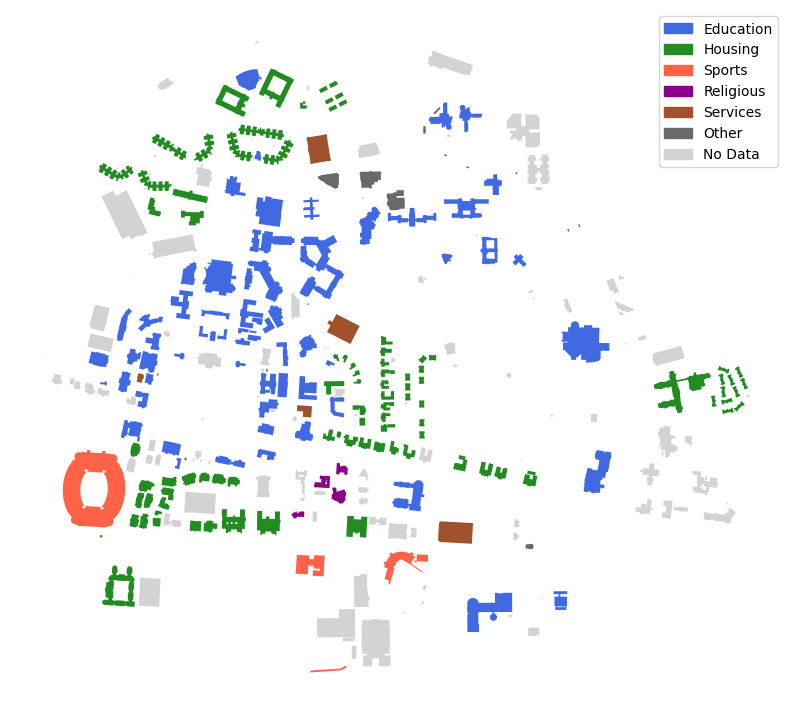

In [15]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 10))

# Plot each building type with the appropriate color
for type in buildings['building'].unique():
    color = colors[type]
    buildings[buildings['building'] == type].plot(ax=ax, color=color)

ax.axis('off')

# Create legend
legend_handles = [
    mpatches.Patch(color=education_color, label='Education'),
    mpatches.Patch(color=housing_color, label='Housing'),
    mpatches.Patch(color=sports_color, label='Sports'),
    mpatches.Patch(color=religious_color, label='Religious'),
    mpatches.Patch(color=services_color, label='Services'),
    mpatches.Patch(color=other_color, label='Other'),
    mpatches.Patch(color=undefined_color, label='No Data'),
]
ax.legend(handles=legend_handles)

plt.show();

### Applying a Projection on a Map

As mentioned above, the `geocode_to_gdf` function can take a list of places to look up as an argument. Doing so returns a single GeoDataFrame that contains the data for all of the locations. Note that each state queried is represented by a row in the GeoDataFrame.

The example below looks at the states designated as part of the South by the U.S. Census Bureau.

In [16]:
places = [
    'Alabama, USA', 'Mississippi, USA', 'Louisiana, USA', 'Arkansas, USA', 'Tennessee, USA',
    'Florida, USA', 'Georgia, USA', 'South Carolina, USA', 'North Carolina, USA',
    'Kentucky, USA', 'Texas, USA', 'Oklahoma, USA', 'Virginia, USA', 'West Virginia, USA',
    'Maryland, USA', 'District of Columbia, USA', 'Delaware, USA'
]
southern_states = ox.geocode_to_gdf(places)

# Display the top rows of the GeoPandas DataFrame
southern_states.head()

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-88.4731 31.8939, -88.47264 31.87512...",-88.473101,30.143376,-84.888289,35.008112,317707064,relation,161950,33.258882,-86.829534,boundary,administrative,8,0.762782,state,Alabama,"Alabama, United States"
1,"POLYGON ((-91.65501 31.25178, -91.65491 31.250...",-91.655009,30.143677,-88.097795,34.996017,307325698,relation,161943,32.971528,-89.734850,boundary,administrative,8,0.742110,state,Mississippi,"Mississippi, United States"
2,"POLYGON ((-94.04319 32.62108, -94.04309 32.592...",-94.043187,28.854289,-88.758331,33.019594,282786027,relation,224922,30.870388,-92.007126,boundary,administrative,8,0.756099,state,Louisiana,"Louisiana, United States"
3,"POLYGON ((-94.61788 36.4995, -94.61772 36.4987...",-94.617875,33.004246,-89.644395,36.499600,309107808,relation,161646,35.204888,-92.447911,boundary,administrative,8,0.746014,state,Arkansas,"Arkansas, United States"
4,"POLYGON ((-90.3103 35.0043, -90.31008 35.00105...",-90.310298,34.982938,-81.647219,36.678118,313673419,relation,161838,35.773008,-86.282008,boundary,administrative,8,0.764411,state,Tennessee,"Tennessee, United States"


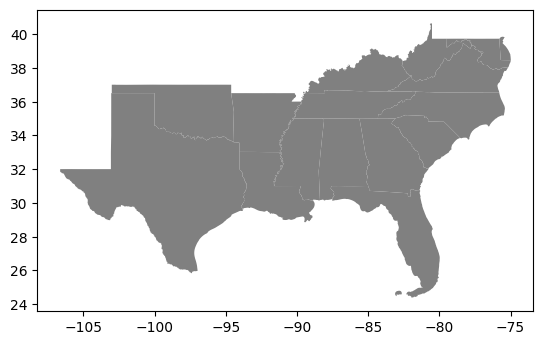

In [17]:
southern_states.plot(fc='gray');

The `project_gdf` method allows us to project a GeoDataFrame to a coordinate reference system (CRS). By default, OSMnx uses UTM projection centered on your data, so please note that distance measurements may be inaccurate for areas over 620 mi (1000 km) wide. However, this can be modified by setting the `to_crs` tag with a string or a CRS object from <a href="https://pyproj4.github.io/pyproj/stable/" target="_blank">pyproj</a>.

If you would like to learn more about UTM zones, please see this <a href="https://gisgeography.com/utm-universal-transverse-mercator-projection/" target="_blank">article from GISGeography.com</a>. For more information on how you can use the `project_gdf` method, please see the <a href="https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.projection.project_gdf" target="_blank">OSMnx User Reference</a>.

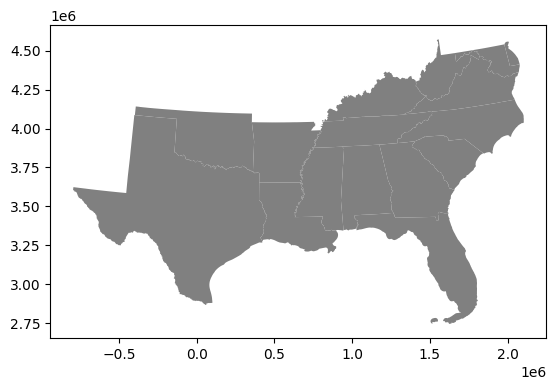

In [18]:
projected_southern_states = ox.projection.project_gdf(southern_states)
projected_southern_states.plot(fc='gray');

Since the projection above uses a UTM zone, the origin of the graph is where the central meridian intersects the equator. Additionally, the values on the axes are in millions of meters (or thousands of kilometers), so the distance from central Texas to central Louisiana is approximately 500 km.

## 3. Street Networks

The street data for a location can be retrieved with the following methods:
- `graph_from_address`
- `graph_from_bbox`
- `graph_from_place`
- `graph_from_point`
- `graph_from_polygon`
- `graph_from_xml`

The examples below all use the `graph_from_place` method.

### Plotting Street Networks

The `graph_from_place` method can be used to generate a variety of street networks by setting the `network_type`:
- `drive`
- `bike`
- `walk`
- `drive_service`
- `all`
- `all_private`

For more information on how you can use the `graph_from_place` method, please see the <a href="https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.graph" target="_blank">OSMnx User Reference</a>.

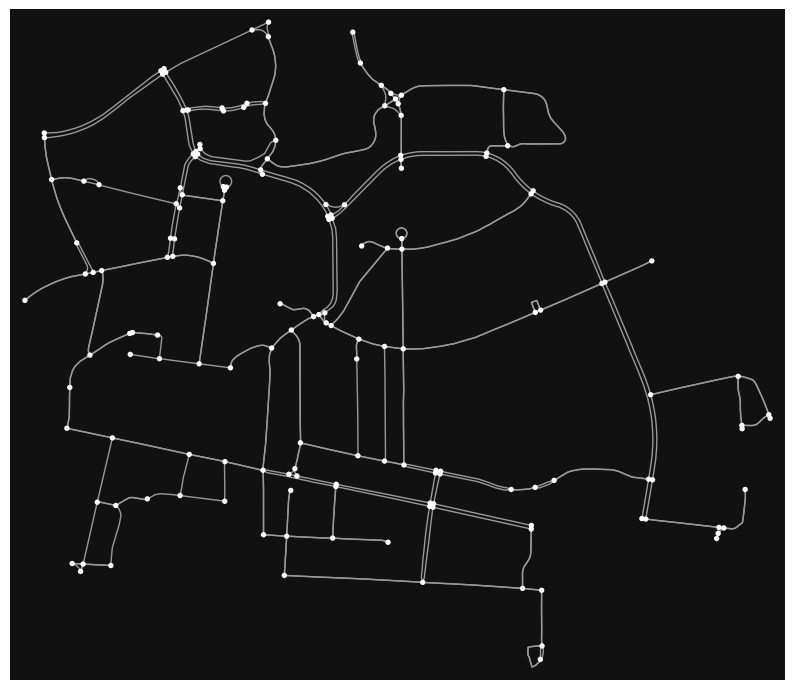

In [19]:
drive_graph = ox.graph_from_place('University of Alabama, Tuscaloosa', network_type='drive')
ox.plot_graph(drive_graph, figsize=(10, 10));

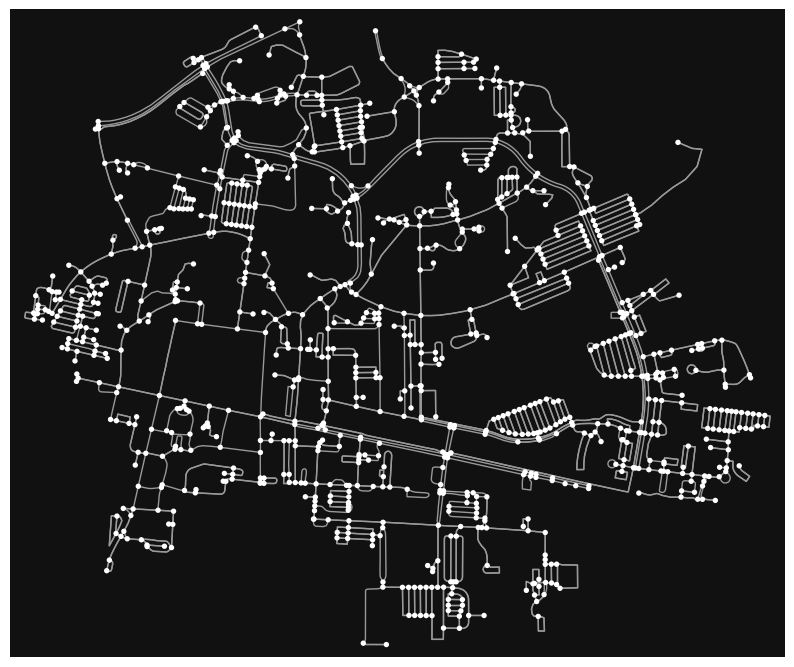

In [20]:
bike_graph = ox.graph_from_place('University of Alabama, Tuscaloosa', network_type='bike')
ox.plot_graph(bike_graph, figsize=(10, 10));

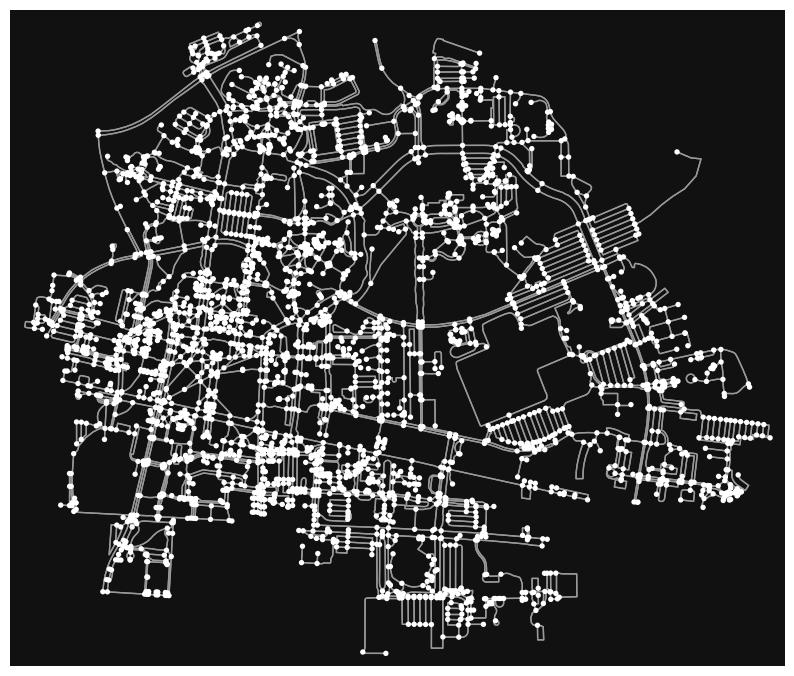

In [21]:
walk_graph = ox.graph_from_place('University of Alabama, Tuscaloosa', network_type='walk')
ox.plot_graph(walk_graph, figsize=(10, 10));

### Finding the Shortest Route Between Two Nodes

Now that we have created street networks, we can use the `shortest_path` method to find the shortest path between two nodes.

Note that in order to use this method, the `scikit-learn` Python library must be installed.

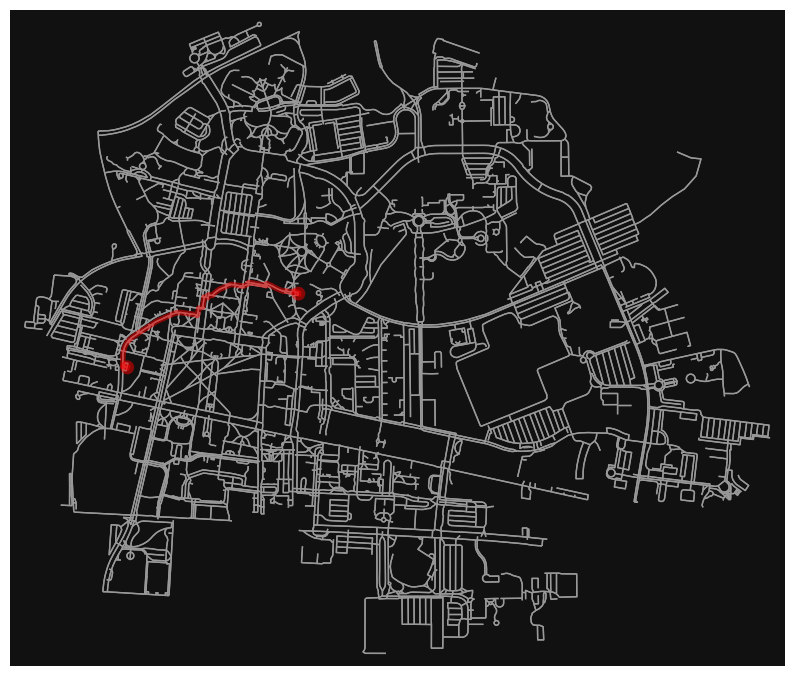

In [25]:
origin = (33.211078599884964, -87.54927369336447)       # Angelo Bruno Business Library
destination = (33.21344833663583, -87.54291076951604)   # Rodgers Library

# Find the nodes nearest to each set of coordinates
origin_node = ox.distance.nearest_nodes(walk_graph, origin[1], origin[0])
destination_node = ox.distance.nearest_nodes(walk_graph, destination[1], destination[0])

# Find the shortest path and graph it
route = ox.shortest_path(walk_graph, origin_node, destination_node)
fig, ax = ox.plot_graph_route(walk_graph, route, node_size=0, figsize=(10, 10))

Using the `route_to_gdf` method, we can also find the distance of this route.

In [26]:
length = int(sum(ox.routing.route_to_gdf(walk_graph, route, weight="length")["length"]))
print(f'The route is {length} meters.')

The route is 850 meters.
